# **Ridge Regression for Olympics medals prediction dataset**

# **About the Dataset**

This dataset contains information about countries that have secured medals in olympics yearwise. This dataset contains 9 features out of which 8 features are the independent variables and the last feature i.e. the medal is the dependent feature that is to be predicted.

# **Dataset Description**

**Independent variables**

1) team : Teams representing the country

2) year : year in which the olympics is being held

3) athletes : Total number of athletes representing the team

4) events :  Total number of events participated by the teams

5) age : Average age of the athletes participating in each country

6) weight : Average weight of the athletes participating in each country

7) height : Average height of the athletes participating in each country

8) prev_medals : previous number of medals won by each country prior to the year

**Target**

9) medal : The total number of medals won by that country that particular year

In [1]:
#importing the libraries
import scipy.stats as stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [2]:
#Reading the dataset
df = pd.read_csv("/content/drive/MyDrive/Datasets/teams (1).csv")
df.shape

(2014, 9)

In [3]:
df.head()

,team,year,athletes,events,age,height,weight,prev_medals,medals
0,AFG,1964,8,8,22.0,161.0,64.2,0.0,0
1,AFG,1968,5,5,23.2,170.2,70.0,0.0,0
2,AFG,1972,8,8,29.0,168.3,63.8,0.0,0
3,AFG,1980,11,11,23.6,168.4,63.2,0.0,0
4,AFG,2004,5,5,18.6,170.8,64.8,0.0,0


In [4]:
#Here we are creating 3 different lists for segregating features between categorical,Numerical and also the features required for calculating Outliers
CategoricalFeatures = [feature for feature in df.columns if df[feature].dtypes =='O']
NumericalFeatures = [feature for feature in df.columns if feature not in CategoricalFeatures]
OutlierFeatures = [feature for feature in df.columns if feature not in CategoricalFeatures+['year']+['medals']]

print("Categorical features is=======>",CategoricalFeatures)
print("Numerical features is=======>",NumericalFeatures)
print("Outlier features is=======>",OutlierFeatures)

Categorical features is=======> ['team']
Numerical features is=======> ['year', 'athletes', 'events', 'age', 'height', 'weight', 'prev_medals', 'medals']
Outlier features is=======> ['athletes', 'events', 'age', 'height', 'weight', 'prev_medals']


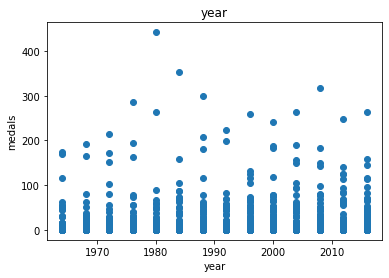

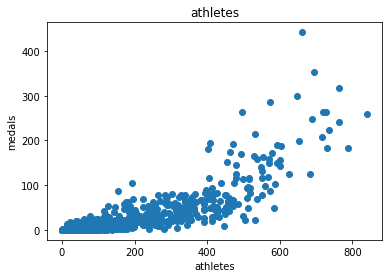

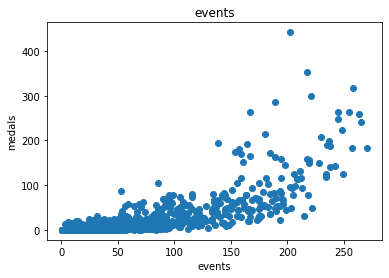

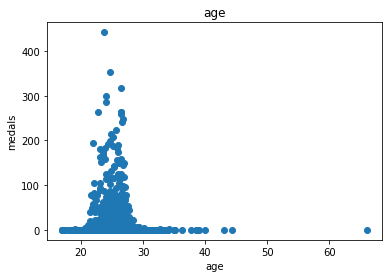

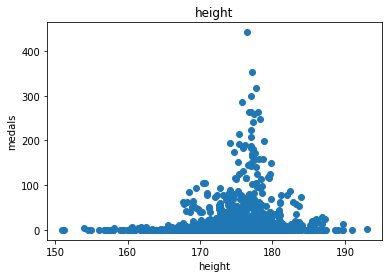

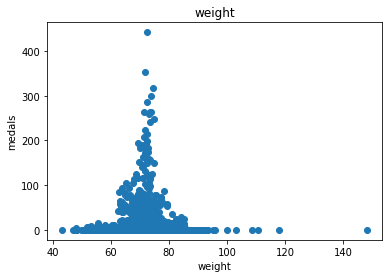

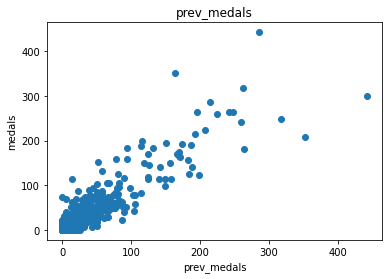

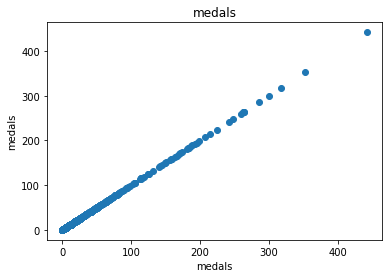

In [5]:
#Plotting a scatter plot for all the Numerical variables
for feature in NumericalFeatures:
  data=df.copy()
  plt.scatter(data[feature],data['medals'])
  plt.xlabel(feature)
  plt.ylabel('medals')
  plt.title(feature)
  plt.show()

In [6]:
"""
plt.scatter(df['year'],df['medals'])
plt.xlabel('year')
plt.ylabel('medals')
plt.title('year vs medals')
plt.show()"""

"\nplt.scatter(df['year'],df['medals'])\nplt.xlabel('year')\nplt.ylabel('medals')\nplt.title('year vs medals')\nplt.show()"

Here in the below to bar charts we are trying to figure out the difference in previous medals and current year won by that country according to that country

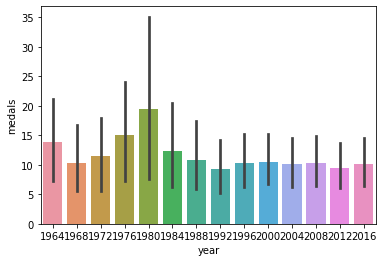

In [7]:
sns.barplot(x = df['year'],y = df['medals'],data = df)
plt.show()

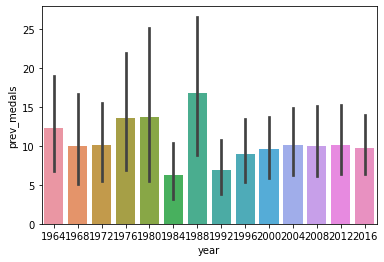

In [8]:
sns.barplot(x = df['year'],y = df['prev_medals'],data = df)
plt.show()

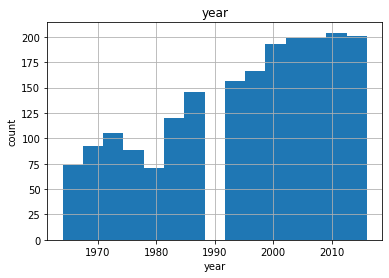

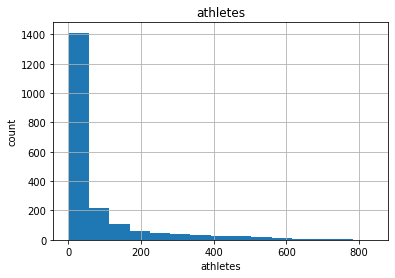

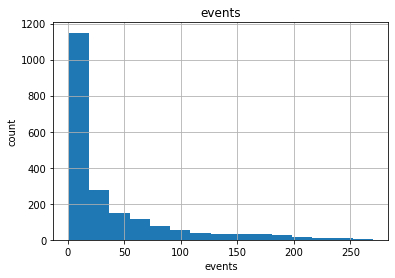

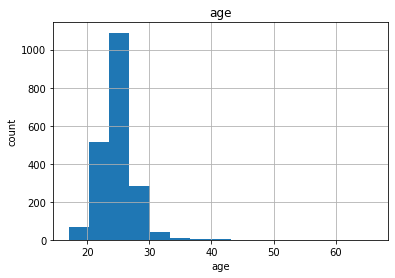

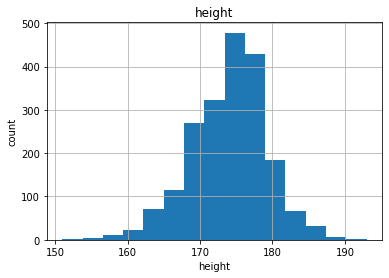

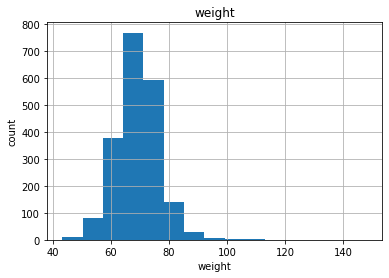

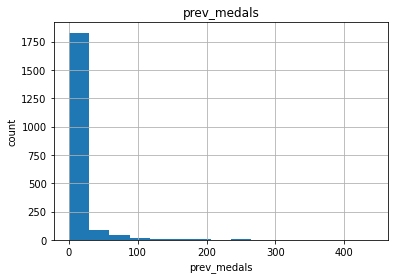

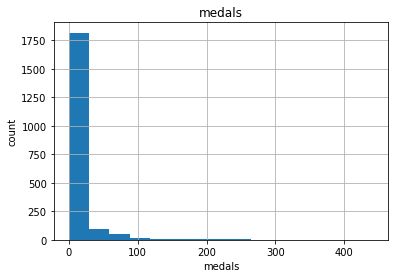

In [9]:
#Plotting the histogram plots the Numerical variables
for feature in NumericalFeatures:
  data=df.copy()
  data[feature].hist(bins = 15)
  plt.xlabel(feature)
  plt.ylabel('count')
  plt.title(feature)
  plt.show()



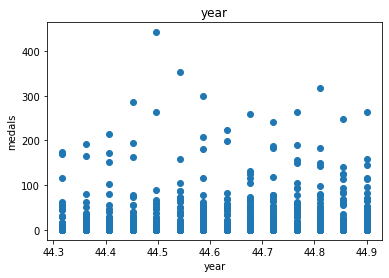

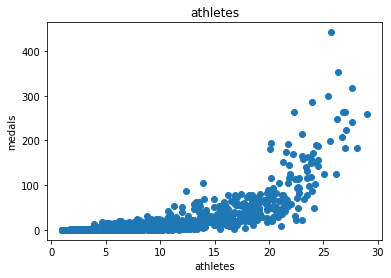

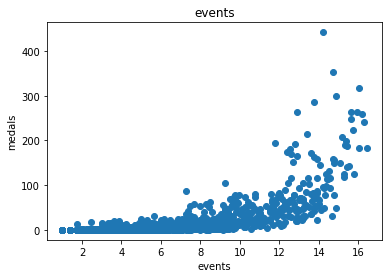

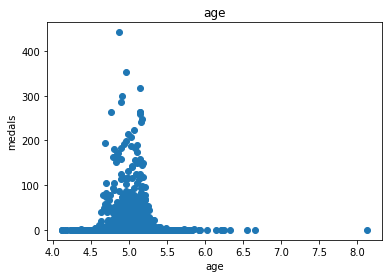

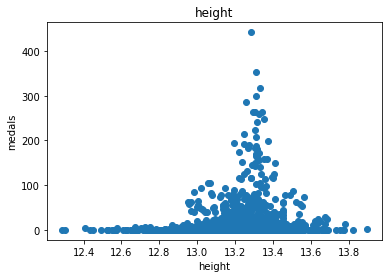

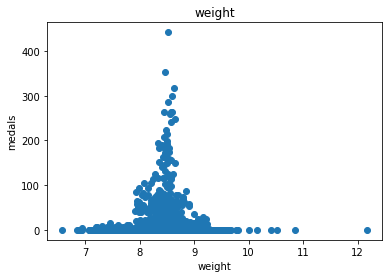

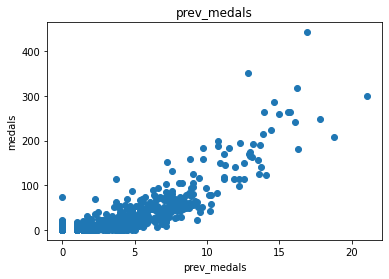

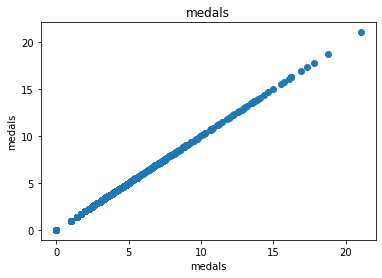

In [10]:
#Applying log transformation as the data was highly skewed and plotting the scatter plot again
for feature in NumericalFeatures:
  data=df.copy()
  #if (0 not in data[feature].unique()):
  data[feature]=np.sqrt(data[feature])
  plt.scatter(data[feature],data['medals'])
  plt.xlabel(feature)
  plt.ylabel('medals')
  plt.title(feature)
  plt.show()

In [11]:
data.head(15)

,team,year,athletes,events,age,height,weight,prev_medals,medals
0,AFG,1964,8,8,22.0,161.0,64.2,0.0,0.0
1,AFG,1968,5,5,23.2,170.2,70.0,0.0,0.0
2,AFG,1972,8,8,29.0,168.3,63.8,0.0,0.0
3,AFG,1980,11,11,23.6,168.4,63.2,0.0,0.0
4,AFG,2004,5,5,18.6,170.8,64.8,0.0,0.0
5,AFG,2008,4,4,22.5,179.2,62.8,0.0,1.0
6,AFG,2012,6,6,24.8,171.7,60.8,1.0,1.0
7,AFG,2016,3,3,24.7,173.7,74.0,1.0,0.0
8,AHO,1964,4,4,28.5,171.2,69.4,0.0,0.0
9,AHO,1968,5,4,31.0,173.2,67.8,0.0,0.0


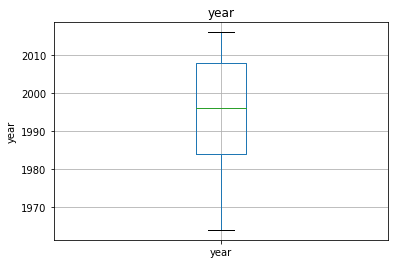

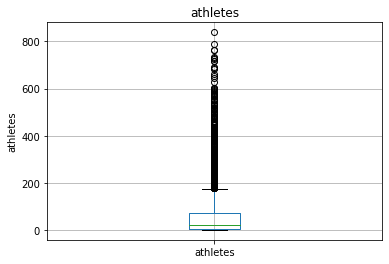

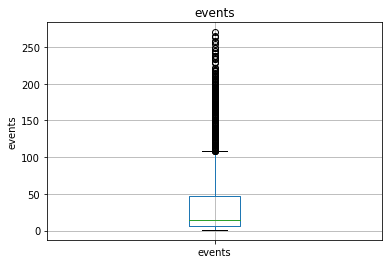

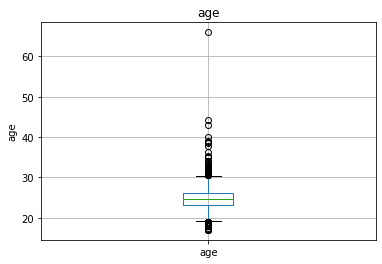

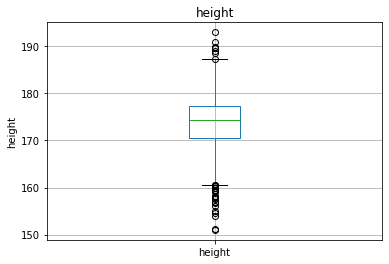

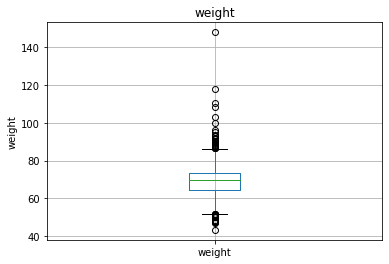

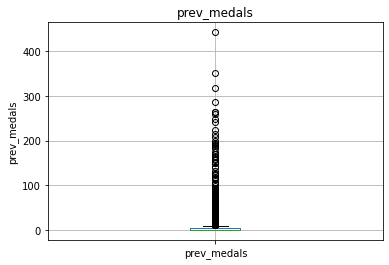

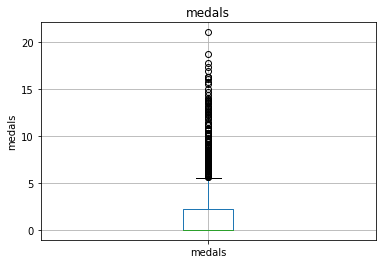

In [12]:
#Plotting the box plot for detecting the outliers
for feature in NumericalFeatures:
  dataOutliers=data.copy()
  dataOutliers[feature]=dataOutliers[feature]
  dataOutliers.boxplot(column = feature)
  plt.ylabel(feature)
  plt.title(feature)
  plt.show()

In [13]:
print(OutlierFeatures)

['athletes', 'events', 'age', 'height', 'weight', 'prev_medals']


In [14]:
#Function for calculating the outliers and storing the index of all the rows associated with it
"""def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    ls = df.index[(df[ft]<lower_limit) | (df[ft]>upper_limit)]

    return ls"""

'def outliers(df, ft):\n    Q1 = df[ft].quantile(0.25)\n    Q3 = df[ft].quantile(0.75)\n    IQR = Q3 - Q1\n\n    lower_limit = Q1 - 1.5*IQR\n    upper_limit = Q3 + 1.5*IQR\n\n    ls = df.index[(df[ft]<lower_limit) | (df[ft]>upper_limit)]\n\n    return ls'

In [15]:
"""
index = []
#age = []
#prev_medals = []
#for features in OutlierFeatures:
index.extend(outliers(data, "athletes"))
index.extend(outliers(data, "age"))
index.extend(outliers(data, "prev_medals"))
index.extend(outliers(data, "medals"))
"""

'\nindex = []\n#age = []\n#prev_medals = []\n#for features in OutlierFeatures:\nindex.extend(outliers(data, "athletes"))\nindex.extend(outliers(data, "age"))\nindex.extend(outliers(data, "prev_medals"))\nindex.extend(outliers(data, "medals"))\n'

In [16]:
"""print((len(athletes)/len(data['athletes']))*100)
print((len(age)/len(data['age']))*100)
print((len(prev_medals)/len(data['prev_medals']))*100)
len(index)"""

"print((len(athletes)/len(data['athletes']))*100)\nprint((len(age)/len(data['age']))*100)\nprint((len(prev_medals)/len(data['prev_medals']))*100)\nlen(index)"

In [17]:
#Function for removing the indexes of all the rows containing outlier index
"""def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df
    """

'def remove(df, ls):\n    ls = sorted(set(ls))\n    df = df.drop(ls)\n    return df\n    '

In [18]:
"""rind = []
for i in index:
  if i not in rind:
    rind.append(i)"""

'rind = []\nfor i in index:\n  if i not in rind:\n    rind.append(i)'

In [19]:
#len(rind)

In [20]:
#data = remove(data, rind)

In [21]:
data.isna().sum()

team           0
year           0
athletes       0
events         0
age            0
height         0
weight         0
prev_medals    0
medals         0
dtype: int64

In [22]:
print(data.dtypes)

team            object
year             int64
athletes         int64
events           int64
age            float64
height         float64
weight         float64
prev_medals    float64
medals         float64
dtype: object


In [23]:
data.duplicated().sum()

0

In [24]:
grps = pd.unique(data.team.values)

In [25]:
grps

array(['AFG', 'AHO', 'ALB', 'ALG', 'AND', 'ANG', 'ANT', 'ARG', 'ARM',
       'ARU', 'ASA', 'AUS', 'AUT', 'AZE', 'BAH', 'BAN', 'BAR', 'BDI',
       'BEL', 'BEN', 'BER', 'BHU', 'BIH', 'BIZ', 'BLR', 'BOL', 'BOT',
       'BRA', 'BRN', 'BRU', 'BUL', 'BUR', 'CAF', 'CAM', 'CAN', 'CAY',
       'CGO', 'CHA', 'CHI', 'CHN', 'CIV', 'CMR', 'COD', 'COK', 'COL',
       'COM', 'CPV', 'CRC', 'CRO', 'CUB', 'CYP', 'CZE', 'DEN', 'DJI',
       'DMA', 'DOM', 'ECU', 'EGY', 'ERI', 'ESA', 'ESP', 'EST', 'ETH',
       'FIJ', 'FIN', 'FRA', 'FRG', 'FSM', 'GAB', 'GAM', 'GBR', 'GBS',
       'GDR', 'GEO', 'GEQ', 'GER', 'GHA', 'GRE', 'GRN', 'GUA', 'GUI',
       'GUM', 'GUY', 'HAI', 'HKG', 'HON', 'HUN', 'INA', 'IND', 'IOA',
       'IRI', 'IRL', 'IRQ', 'ISL', 'ISR', 'ISV', 'ITA', 'IVB', 'JAM',
       'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KIR', 'KOR', 'KSA', 'KUW',
       'LAO', 'LAT', 'LBA', 'LBR', 'LCA', 'LES', 'LIB', 'LIE', 'LTU',
       'LUX', 'MAD', 'MAR', 'MAS', 'MAW', 'MDA', 'MDV', 'MEX', 'MGL',
       'MHL', 'MKD',

In [26]:
#Here we are grouping countries according to the medals won by them each year
d_data = {grp:data['medals'][data.team == grp] for grp in grps}

In [27]:
d_data

{'AFG': 0    0.0
 1    0.0
 2    0.0
 3    0.0
 4    0.0
 5    1.0
 6    1.0
 7    0.0
 Name: medals, dtype: float64, 'AHO': 8     0.0
 9     0.0
 10    0.0
 11    0.0
 12    0.0
 13    1.0
 14    0.0
 15    0.0
 16    0.0
 17    0.0
 18    0.0
 Name: medals, dtype: float64, 'ALB': 19    0.0
 20    0.0
 21    0.0
 22    0.0
 23    0.0
 24    0.0
 Name: medals, dtype: float64, 'ALG': 25    0.000000
 26    0.000000
 27    0.000000
 28    1.414214
 29    0.000000
 30    1.414214
 31    1.732051
 32    2.236068
 33    0.000000
 34    1.414214
 35    1.000000
 36    1.414214
 Name: medals, dtype: float64, 'AND': 37    0.0
 38    0.0
 39    0.0
 40    0.0
 41    0.0
 42    0.0
 43    0.0
 44    0.0
 45    0.0
 46    0.0
 Name: medals, dtype: float64, 'ANG': 47    0.0
 48    0.0
 49    0.0
 50    0.0
 51    0.0
 52    0.0
 53    0.0
 54    0.0
 Name: medals, dtype: float64, 'ANT': 55    0.0
 56    0.0
 57    0.0
 58    0.0
 59    0.0
 60    0.0
 61    0.0
 62    0.0
 63    0.0
 Name: medals, 

In [28]:
data.describe()

,year,athletes,events,age,height,weight,prev_medals,medals
count,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000,2014.000000
mean,1995.227408,76.329692,36.877855,24.812612,173.955164,69.328997,10.248759,1.629012
std,15.227727,129.799427,50.130877,2.758258,5.262469,7.494740,31.951920,2.887997
min,1964.000000,1.000000,1.000000,17.000000,151.000000,43.300000,0.000000,0.000000
25%,1984.000000,7.000000,6.000000,23.300000,170.600000,64.700000,0.000000,0.000000
50%,1996.000000,21.000000,14.000000,24.700000,174.400000,69.500000,0.000000,0.000000
75%,2008.000000,74.750000,47.000000,26.100000,177.300000,73.400000,4.000000,2.236068
max,2016.000000,839.000000,270.000000,66.000000,193.000000,148.000000,442.000000,21.023796


In [29]:
len(data.columns)

9

In [30]:
print(data.head())

  team  year  athletes  events   age  height  weight  prev_medals  medals
0  AFG  1964         8       8  22.0   161.0    64.2          0.0     0.0
1  AFG  1968         5       5  23.2   170.2    70.0          0.0     0.0
2  AFG  1972         8       8  29.0   168.3    63.8          0.0     0.0
3  AFG  1980        11      11  23.6   168.4    63.2          0.0     0.0
4  AFG  2004         5       5  18.6   170.8    64.8          0.0     0.0


In [31]:
#calculating the significance value using ANNOVA test 

F, p = stats.f_oneway(d_data['AFG'], d_data['AHO'], d_data['ALB'], d_data['ALG'], d_data['AND'], d_data['ANG'], d_data['ANT'], d_data['ARG'], d_data['ARM'],d_data['ARU'], d_data['ASA'], d_data['AUT'], d_data['AZE'], d_data['BAH'], d_data['BAN'], d_data['BAR'], d_data['BDI'], d_data['BEL'],d_data['BEN'], d_data['BER'], d_data['BHU'], d_data['BIH'], d_data['BIZ'], d_data['BOL'], d_data['BOT'], d_data['BRA'], d_data['BRN'],d_data['BRU'], d_data['BUL'], d_data['BUR'], d_data['CAF'], d_data['CAM'], d_data['CAY'], d_data['CGO'], d_data['CHA'], d_data['CHI'], d_data['CIV'], d_data['CMR'], d_data['COD'], d_data['COK'], d_data['COL'], d_data['COM'], d_data['CPV'], d_data['CRC'], d_data['CRO'],
d_data['CUB'], d_data['CYP'], d_data['CZE'], d_data['DEN'], d_data['DJI'], d_data['DMA'], d_data['DOM'], d_data['ECU'], d_data['EGY'],d_data['ERI'], d_data['ESA'], d_data['ESP'], d_data['EST'], d_data['ETH'], d_data['FIJ'], d_data['FIN'], d_data['FSM'], d_data['GAB'],
d_data['GAM'], d_data['GBS'], d_data['GEO'], d_data['GEQ'], d_data['GHA'], d_data['GRE'], d_data['GRN'], d_data['GUA'], d_data['GUI'],d_data['GUM'], d_data['GUY'], d_data['HAI'], d_data['HKG'], d_data['HON'], d_data['INA'], d_data['IND'], d_data['IOA'], d_data['IRI'],
d_data['IRL'], d_data['IRQ'], d_data['ISL'], d_data['ISR'], d_data['ISV'], d_data['IVB'], d_data['JAM'], d_data['JOR'], d_data['KAZ'],d_data['KEN'], d_data['KGZ'], d_data['KIR'], d_data['KOR'], d_data['KSA'], d_data['KUW'], d_data['LAO'], d_data['LAT'], d_data['LBA'],
d_data['LBR'], d_data['LCA'], d_data['LES'], d_data['LIB'], d_data['LIE'], d_data['LTU'], d_data['LUX'], d_data['MAD'], d_data['MAR'],d_data['MAS'], d_data['MAW'], d_data['MDA'], d_data['MDV'], d_data['MEX'], d_data['MGL'], d_data['MHL'], d_data['MKD'], d_data['MLI'],
d_data['MLT'], d_data['MNE'], d_data['MON'], d_data['MOZ'], d_data['MRI'], d_data['MTN'], d_data['MYA'], d_data['NAM'], d_data['NCA'],d_data['NED'], d_data['NEP'], d_data['NGR'], d_data['NIG'], d_data['NOR'], d_data['NRU'], d_data['NZL'], d_data['OMA'], d_data['PAK'],
d_data['PAN'], d_data['PAR'], d_data['PER'], d_data['PHI'], d_data['PLE'], d_data['PLW'], d_data['PNG'], d_data['POR'], d_data['PRK'],d_data['PUR'], d_data['QAT'], d_data['RSA'], d_data['RWA'], d_data['SAM'], d_data['SEN'], d_data['SEY'], d_data['SGP'], d_data['SKN'],
d_data['SLE'], d_data['SLO'], d_data['SMR'], d_data['SOL'], d_data['SOM'], d_data['SRB'], d_data['SRI'], d_data['STP'], d_data['SUD'],d_data['SUI'], d_data['SUR'], d_data['SVK'], d_data['SWE'], d_data['SWZ'], d_data['SYR'], d_data['TAN'], d_data['TGA'], d_data['THA'],
d_data['TJK'], d_data['TKM'], d_data['TOG'], d_data['TPE'], d_data['TTO'], d_data['TUN'], d_data['TUR'], d_data['TUV'], d_data['UAE'],d_data['UGA'], d_data['URU'], d_data['UZB'], d_data['VAN'], d_data['VEN'], d_data['VIE'], d_data['VIN'], d_data['VNM'], d_data['YAR'],d_data['YEM'], d_data['ZAM'], d_data['ZIM'])

In [32]:
if p < 0.05:
  print("The null hypothesis is rejected")
else:
  print("The null hypothesis is accepted")

The null hypothesis is rejected


In [33]:
data.corr()

,year,athletes,events,age,height,weight,prev_medals,medals
year,1.000000,-0.078059,-0.039492,-0.013355,-0.011517,0.024624,-0.017917,-0.040413
athletes,-0.078059,1.000000,0.976563,0.035079,0.188917,0.108703,0.810576,0.919986
events,-0.039492,0.976563,1.000000,0.053747,0.211017,0.125992,0.752264,0.896500
age,-0.013355,0.035079,0.053747,1.000000,0.173711,0.213656,0.032596,0.047852
height,-0.011517,0.188917,0.211017,0.173711,1.000000,0.685961,0.138682,0.208397
weight,0.024624,0.108703,0.125992,0.213656,0.685961,1.000000,0.088706,0.129842
prev_medals,-0.017917,0.810576,0.752264,0.032596,0.138682,0.088706,1.000000,0.840265
medals,-0.040413,0.919986,0.896500,0.047852,0.208397,0.129842,0.840265,1.000000


In [34]:
# Checking the correlating value between the Numerical features and target value

NullHypothesis=[]
AlternativeHypothesis=[]
for features in NumericalFeatures:
  if features!='medal':
    correlationValue = data[features].corr(data['medals'])
    if correlationValue > 0.5:
      NullHypothesis.append(features)
    else:
      AlternativeHypothesis.append(features)

In [35]:
NullHypothesis

['athletes', 'events', 'prev_medals', 'medals']

In [36]:
AlternativeHypothesis

['year', 'age', 'height', 'weight']

In [37]:
selectedFeatured=['athletes','events','prev_medals','medals']
df3=data[NullHypothesis]

In [38]:
def robust_scaler(X):
    # Calculate the median and interquartile range (IQR) for each feature
    median = np.median(X, axis=0)
    Q1 = X.quantile(0.25)
    Q3 = X.quantile(0.75)
    IQR = Q3 - Q1

    # Scale the data
    X_scaled = (X - median) / IQR

    return X_scaled

In [39]:
dataframe = robust_scaler(df3)
#dataframe=df3

In [40]:
dataframe

,athletes,events,prev_medals,medals
0,-0.191882,-0.146341,0.00,0.000000
1,-0.236162,-0.219512,0.00,0.000000
2,-0.191882,-0.146341,0.00,0.000000
3,-0.147601,-0.073171,0.00,0.000000
4,-0.236162,-0.219512,0.00,0.000000
...,...,...,...,...
2009,0.073801,0.121951,0.00,0.000000
2010,-0.103321,-0.073171,0.00,0.774597
2011,-0.073801,0.024390,0.75,0.894427
2012,-0.177122,-0.146341,1.00,0.000000


In [43]:
dataframe.describe()

,athletes,events,prev_medals,medals
count,2014.000000,2014.000000,2014.00000,2014.000000
mean,0.816674,0.557996,2.56219,0.728517
std,1.915859,1.222704,7.98798,1.291552
min,-0.295203,-0.317073,0.00000,0.000000
25%,-0.206642,-0.195122,0.00000,0.000000
50%,0.000000,0.000000,0.00000,0.000000
75%,0.793358,0.804878,1.00000,1.000000
max,12.073801,6.243902,110.50000,9.402127


In [42]:
#Standardising the columns so that its mean is around 0 and Standard deviation is around 1
df3_mean = dataframe.mean()
df3_std = dataframe.std()
df4 = (dataframe - df3_mean) / df3_std

In [44]:
df4.describe()

,athletes,events,prev_medals,medals
count,2.014000e+03,2014.000000,2.014000e+03,2.014000e+03
mean,1.411207e-17,0.000000,3.704418e-17,-9.878449e-17
std,1.000000e+00,1.000000,1.000000e+00,1.000000e+00
min,-5.803546e-01,-0.715684,-3.207556e-01,-5.640630e-01
25%,-5.341294e-01,-0.615945,-3.207556e-01,-5.640630e-01
50%,-4.262707e-01,-0.456363,-3.207556e-01,-5.640630e-01
75%,-1.217026e-02,0.201914,-1.955676e-01,2.101995e-01
max,5.875760e+00,4.650271,1.351253e+01,6.715651e+00


In [45]:
df4.corr()

,athletes,events,prev_medals,medals
athletes,1.000000,0.976563,0.810576,0.919986
events,0.976563,1.000000,0.752264,0.896500
prev_medals,0.810576,0.752264,1.000000,0.840265
medals,0.919986,0.896500,0.840265,1.000000


In [46]:
df4.head()

,athletes,events,prev_medals,medals
0,-0.526425,-0.576049,-0.320756,-0.564063
1,-0.549538,-0.635893,-0.320756,-0.564063
2,-0.526425,-0.576049,-0.320756,-0.564063
3,-0.503313,-0.516206,-0.320756,-0.564063
4,-0.549538,-0.635893,-0.320756,-0.564063


In [47]:
X=df4.iloc[:,:-1]
#X=X.drop(['3'],axis=1)
Y=df4[df4.columns[-1]]

In [48]:
#Splitting the data into train and test data set
X_train, X_test,Y_train,Y_test = train_test_split(X,Y ,test_size=0.1, random_state=1)

In [49]:
X_train

,athletes,events,prev_medals
675,-0.564946,-0.675788,-0.320756
1695,-0.518721,-0.576049,-0.320756
1733,1.368807,2.017163,0.305185
634,2.863420,3.353665,1.337987
1656,-0.572650,-0.695736,-0.320756
...,...,...,...
1791,-0.279891,-0.236937,-0.289459
1096,-0.310708,-0.276832,-0.320756
1932,4.951257,4.151576,7.440906
235,-0.487904,-0.516206,-0.320756


In [50]:
Y_train

675    -0.564063
1695   -0.217802
1733    1.454966
634     2.474362
1656   -0.564063
          ...   
1791   -0.217802
1096   -0.217802
1932    5.062007
235    -0.564063
1061    0.035678
Name: medals, Length: 1812, dtype: float64

In [51]:
X_test

,athletes,events,prev_medals
309,-0.557242,-0.655840,-0.320756
285,0.567570,0.959930,0.336482
919,-0.156624,0.082228,-0.289459
120,0.128431,0.501131,-0.070379
585,-0.310708,-0.137198,-0.226865
...,...,...,...
275,-0.564946,-0.675788,-0.320756
400,-0.441679,-0.436415,0.242591
972,-0.526425,-0.576049,-0.320756
1638,-0.025653,0.461236,-0.164271


In [52]:
Y_test

309    -0.564063
285     0.684398
919    -0.564063
120     0.035678
585    -0.074376
          ...   
275    -0.564063
400    -0.217802
972    -0.564063
1638    0.210199
1330    1.758724
Name: medals, Length: 202, dtype: float64

In [53]:
#class function for Ridge Regression

class RidgeRegression:
  def __init__(self, learningRate):
    self.learningRate = learningRate         #Initialising the learningRate
    

  def fit(self,Xtrain,Ytrain):
    X_train = Xtrain 
    Y_train = Ytrain
    alpha = self.learningRate

    x_mean = X_train.mean()
    x_std = X_train.std()

    X2 = (X_train - x_mean) / x_std
    X2.insert(0,'intercept',1)            #Adding the intercept column

    identity = np.identity(len(X2.columns))
    identity[0,0] = 0                          #setting the first row value of identity matrix to 0 
    penalty1 = identity * alpha

    global res
    res = np.dot(np.dot(np.linalg.inv(np.dot(X2.T, X2) + penalty1), X2.T),Y_train)              #Applying the ridge formula
    return res

  def predict(self,Xtest):
    X_test = Xtest
 
    x_mean = X_test.mean()
    x_std = X_test.std()

    X3 = (X_test - x_mean) / x_std
    X3.insert(0,'intercept',1)

    y_pred = np.dot(X3, res)

    return y_pred
    

In [54]:
ridge = RidgeRegression(learningRate=0.7)

In [55]:
res = ridge.fit(X_train,Y_train)
res

array([-0.00690616,  0.44218933,  0.21958727,  0.31311927])

In [56]:
ypred = ridge.predict(X_test)

In [57]:
len(ypred)

202

In [58]:
def rsquare(Ytest,Ypred):
  ss_res = ((Ytest - Ypred) ** 2).sum()
  ss_tot = ((Ytest - Ypred.mean()) ** 2).sum()
  r2 = 1 - (ss_res / ss_tot)
  return r2


In [59]:
def rmse(Ytest,Ypred):
    squared_error = (Ytest - Ypred) ** 2
    mean_squared_error = np.mean(squared_error)
    rmse = np.sqrt(mean_squared_error)
    return rmse

In [60]:
def mae(Ytest,Ypred):
    absolute_error = np.abs(Ytest - Ypred)
    mae = np.mean(absolute_error)
    return mae

In [61]:
print("RMSE------->",rmse(Y_test,ypred))
print("rSquare---->",rsquare(Y_test, ypred))
print("MAE-------->",mae(Y_test, ypred))

RMSE-------> 0.36133693393884075
rSquare----> 0.8852951692222578
MAE--------> 0.2334131226182233


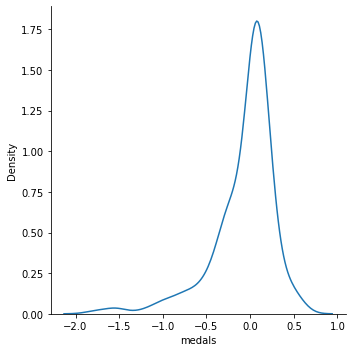

In [62]:
sns.displot(ypred-Y_test,kind='kde')

In [63]:
from sklearn.linear_model import Ridge
RidgeRegressor = Ridge(alpha=0.7)

In [64]:
yfit = RidgeRegressor.fit(X_train,Y_train)
yfit

Ridge(alpha=0.7)

In [65]:
yp = RidgeRegressor.predict(X_test)

In [66]:
print("RMSE------->",rmse(Y_test,yp))
print("rSquare---->",rsquare(Y_test, yp))
print("MAE-------->",mae(Y_test, yp))

RMSE-------> 0.35123765031614523
rSquare----> 0.8912248021334556
MAE--------> 0.24222748486246168


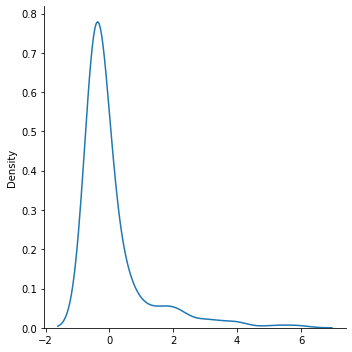

In [67]:
import seaborn as sns
sns.displot(yp,kind='kde')